# Display training loss

This notebook extracts Tensorboard logs.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [2]:
# Choose session
session_folder = "../sessions/foo/"

In [3]:
# Load Tensorboard events
accumulator = EventAccumulator(session_folder)
accumulator.Reload();

In [4]:
# Available scalar tags
accumulator.Tags()["scalars"]

['train_policy_loss', 'train_value_loss', 'epoch']

In [5]:
# Get policy loss
events = accumulator.Scalars("train_policy_loss")
policy_df = pd.DataFrame(events).rename(columns={"value": "policy_loss"})
policy_df

,wall_time,step,policy_loss
0,1.735652e+09,19,1.937031
1,1.735652e+09,39,1.934224
2,1.735652e+09,59,1.940009
3,1.735652e+09,79,1.944069
4,1.735652e+09,99,1.934203
...,...,...,...
7718,1.735699e+09,154379,1.171302
7719,1.735699e+09,154399,1.388978
7720,1.735699e+09,154419,1.332158
7721,1.735699e+09,154439,1.216079


In [6]:
# Get value loss
events = accumulator.Scalars("train_value_loss")
value_df = pd.DataFrame(events).rename(columns={"value": "value_loss"})
value_df

,wall_time,step,value_loss
0,1.735652e+09,19,0.861780
1,1.735652e+09,39,0.869201
2,1.735652e+09,59,0.739296
3,1.735652e+09,79,0.690552
4,1.735652e+09,99,0.715570
...,...,...,...
7718,1.735699e+09,154379,0.450982
7719,1.735699e+09,154399,0.423868
7720,1.735699e+09,154419,0.522255
7721,1.735699e+09,154439,0.433566


In [7]:
# Pack as a single data frame
df = pd.merge(policy_df, value_df.drop(columns="wall_time"), on="step")
df["wall_time"] = pd.to_datetime(df["wall_time"] * 1e9)
df

,wall_time,step,policy_loss,value_loss
0,2024-12-31 13:38:15.036158976,19,1.937031,0.861780
1,2024-12-31 13:38:45.223838976,39,1.934224,0.869201
2,2024-12-31 13:39:15.259450112,59,1.940009,0.739296
3,2024-12-31 13:39:45.310372096,79,1.944069,0.690552
4,2024-12-31 13:40:15.354013952,99,1.934203,0.715570
...,...,...,...,...
7718,2025-01-01 02:40:27.538227968,154379,1.171302,0.450982
7719,2025-01-01 02:40:42.772090880,154399,1.388978,0.423868
7720,2025-01-01 02:40:47.295334912,154419,1.332158,0.522255
7721,2025-01-01 02:40:51.095660032,154439,1.216079,0.433566


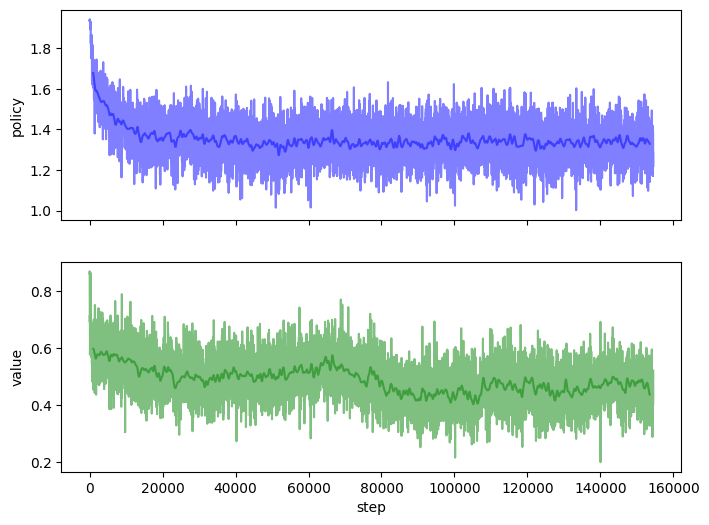

In [8]:
# Show losses
_, axes = plt.subplots(2, sharex=True, figsize=(8, 6))
axes[0].plot(df["step"], df["policy_loss"], alpha=0.5, c="b")
axes[0].plot(
    df["step"],
    df["policy_loss"].rolling(100, center=True, win_type="gaussian").mean(std=10.0),
    c="b",
    alpha=0.5,
)
axes[0].set_ylabel("policy")
axes[1].plot(df["step"], df["value_loss"], alpha=0.5, c="g")
axes[1].plot(
    df["step"],
    df["value_loss"].rolling(100, center=True, win_type="gaussian").mean(std=10.0),
    c="g",
    alpha=0.5,
)
axes[1].set_ylabel("value")
axes[-1].set_xlabel("step")
plt.show()